In [4]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

from numpy import array
#from keras.models import Sequential
#from keras.layers import LSTM
#from keras.layers import Dense
#from keras.layers import Dropout  
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import inv_boxcox
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
#from Data import Data
from datetime import datetime
from netCDF4 import Dataset
import matplotlib.dates as mdates
#from sklearn.neural_network import MLPRegressor
#from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from math import sqrt
import seaborn as sns
#from climate_indices import indices,compute
#from climate_indices.indices import Distribution

In [5]:
def fuzzify(x):
  # Add some "measurement error"" to each data point
    zero_idx = x==0
    x[zero_idx]+=0.005*np.random.uniform(0,1,1)[0]
    x[~zero_idx]+=0.005*np.random.uniform(-1,1,1)[0]
#return(y)

def fuzzify1(x):
  # Add some "measurement error"" to each data point
    for i in range(len(x)):
        if x[i]==0:
            x[i]+=0.005*np.random.uniform(0,1,1)[0]
        else:
            x[i]+=0.005*np.random.uniform(-1,1,1)[0]


#def train_test_split_ts_2d_raw(X, y, n*f):

def train_test_split_ts_2d_raw(X, h):
    return(X[:-h],X[-h:])


def train_test_split_ts(X, y, test_size=0.2):
    r = X.shape[0]
    split_index = int((1-test_size)*r)
    return(X[:split_index,:,:],X[split_index:,:,:],y[:split_index],y[split_index:])

def train_test_split_ts_index(X, y, split_index):
    r = X.shape[0]
    return(X[:split_index,:,:],X[split_index:,:,:],y[:split_index],y[split_index:])

def train_test_split_ts_2d(X, y, test_size=0.2):
    r = X.shape[0]
    split_index = int((1-test_size)*r)
    return(X[:split_index,:],X[split_index:,:],y[:split_index],y[split_index:])

def train_test_split_ts_2d_index(X, y, split_index):
    r = X.shape[0]
    return(X[:split_index,:],X[split_index:,:],y[:split_index],y[split_index:])

def phase_averaging(data,freq = 12):
    N = len(data)
    temp = data
    result = np.zeros(N)
    averages = np.zeros(freq)
    for j in range(freq):
        Idx = np.arange(j,N,freq)
        averages[j] = temp[Idx].mean()
        result[Idx] = temp[Idx] - temp[Idx].mean()
    return(result, averages)

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
data = pd.read_csv("precipitationBSh.csv")
data = data["0"].values
x = data

In [4]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)
r = np.arange(len(x[-400:-1]))
plt.plot(r,x[-400:-1]);
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))   #to get a tick every 15 minutes
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.xlabel('time', fontsize = 20)
plt.ylabel("monthly rainfall (mm)", fontsize = 20)
plt.title("Monthly rainfall steppe climate classification", fontsize = 25)
plt.grid()
plt.savefig("steppe.png")

In [8]:
841 - 815

26

In [ ]:
spi_x = 

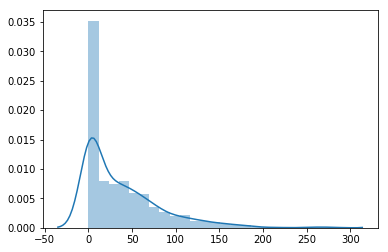

In [5]:
sns.distplot(x)

In [10]:
sns.distplot(x_transforme)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


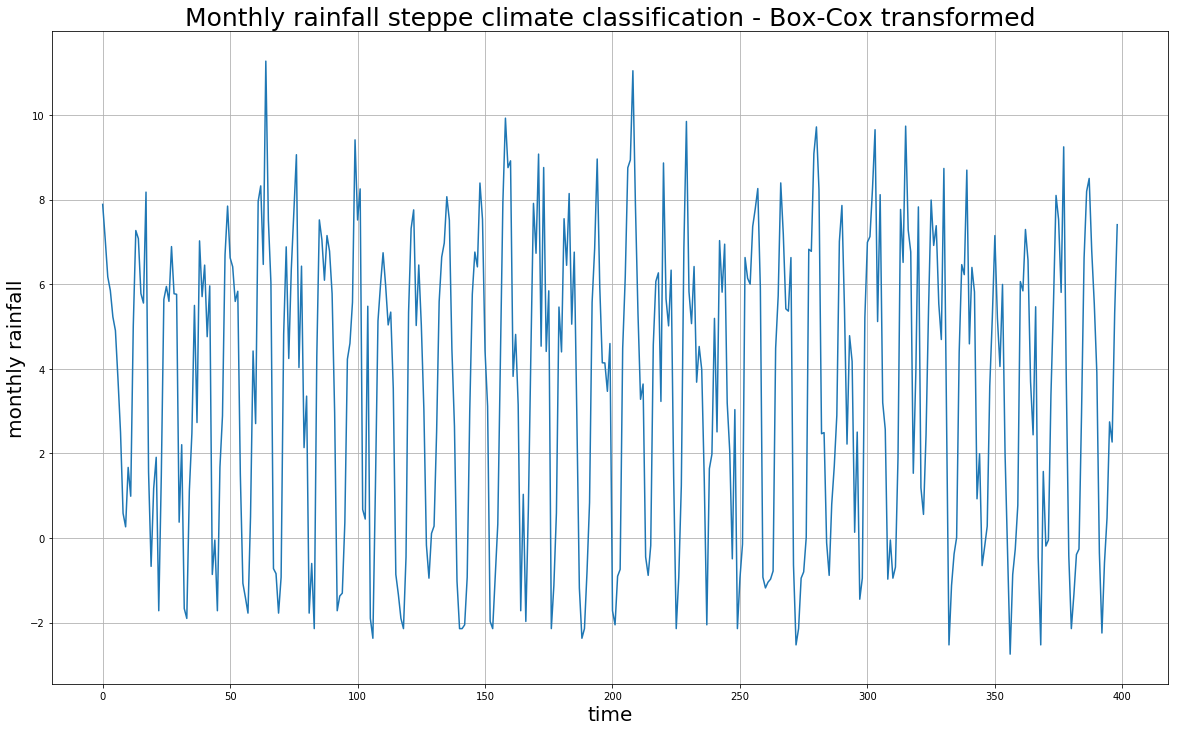

In [6]:
fuzzify(x)
x_transforme, lambda_ = stats.boxcox(x)
plt.figure(figsize=(20,12))
r = np.arange(len(x[-400:-1]))
plt.plot(r,x_transforme[-400:-1])
plt.xlabel('time', fontsize = 20)
plt.ylabel("monthly rainfall", fontsize = 20)
plt.title("Monthly rainfall steppe climate classification - Box-Cox transformed", fontsize = 25)
plt.grid()
plt.savefig("steppeTrans.png")

In [170]:
data = pd.read_csv("precipitationBWh.csv")
data = data["0"].values
x = data

In [172]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)
r = np.arange(len(x[-400:-1]))
plt.plot(r,x[-400:-1]);
#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))   #to get a tick every 15 minutes
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.xlabel('time', fontsize = 20)
plt.ylabel("monthly rainfall (mm)", fontsize = 20)
plt.title("Monthly rainfall desert climate classification", fontsize = 25)
plt.grid()
plt.savefig("desert.png")

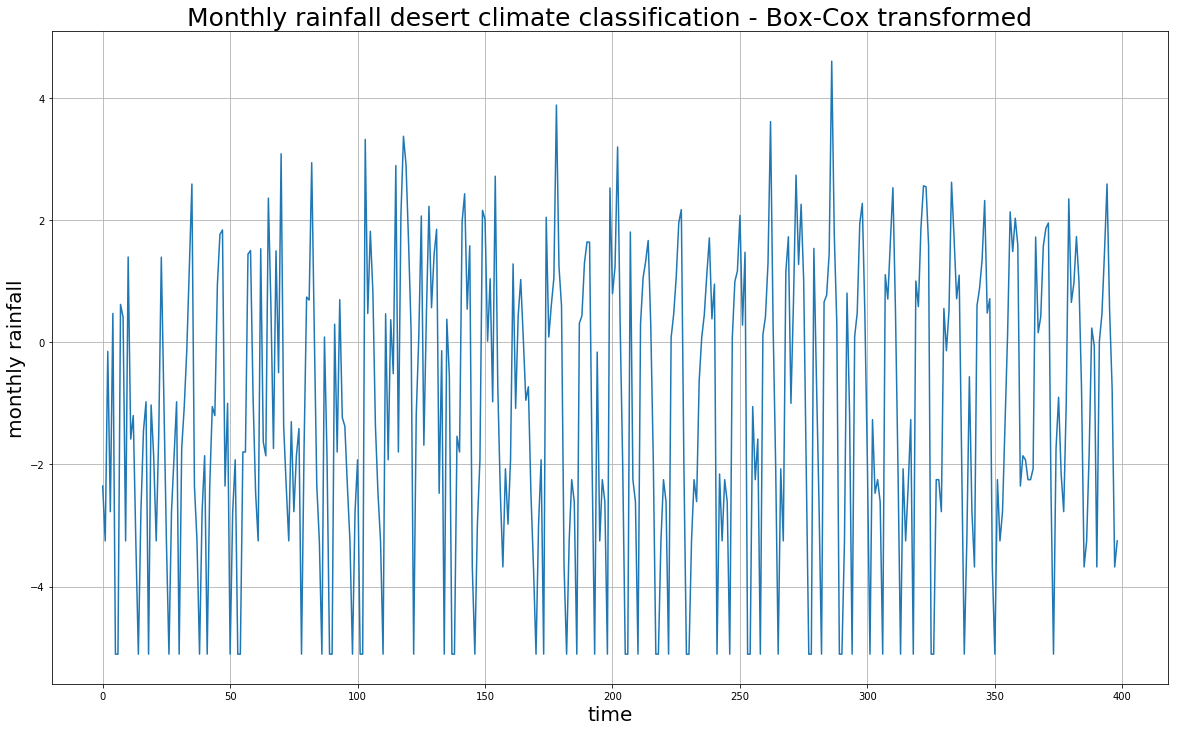

In [173]:
fuzzify(x)
x_transforme, lambda_ = stats.boxcox(x)
plt.figure(figsize=(20,12))
r = np.arange(len(x[-400:-1]))
plt.plot(r,x_transforme[-400:-1])
plt.xlabel('time', fontsize = 20)
plt.ylabel("monthly rainfall", fontsize = 20)
plt.title("Monthly rainfall desert climate classification - Box-Cox transformed", fontsize = 25)
plt.grid()
plt.savefig("desertTrans.png")

In [122]:
temporal_limits = {"time_min":datetime(2000, 1, 1, 0, 0),"time_max":datetime(2016, 1, 1, 0, 0) } 
spatial_limits = {"lat_min":1.25,"lat_max":1.25,"lon_min":21.25,"lon_max":21.25}
d = Data('precipitation.nc','precip',temporal_limits,spatial_limits)

x = d.get_data()
x = np.squeeze(np.asarray(x))

date = d.get_date()
times = [date[i].strftime("%Y-%m") for i in range(len(date))]

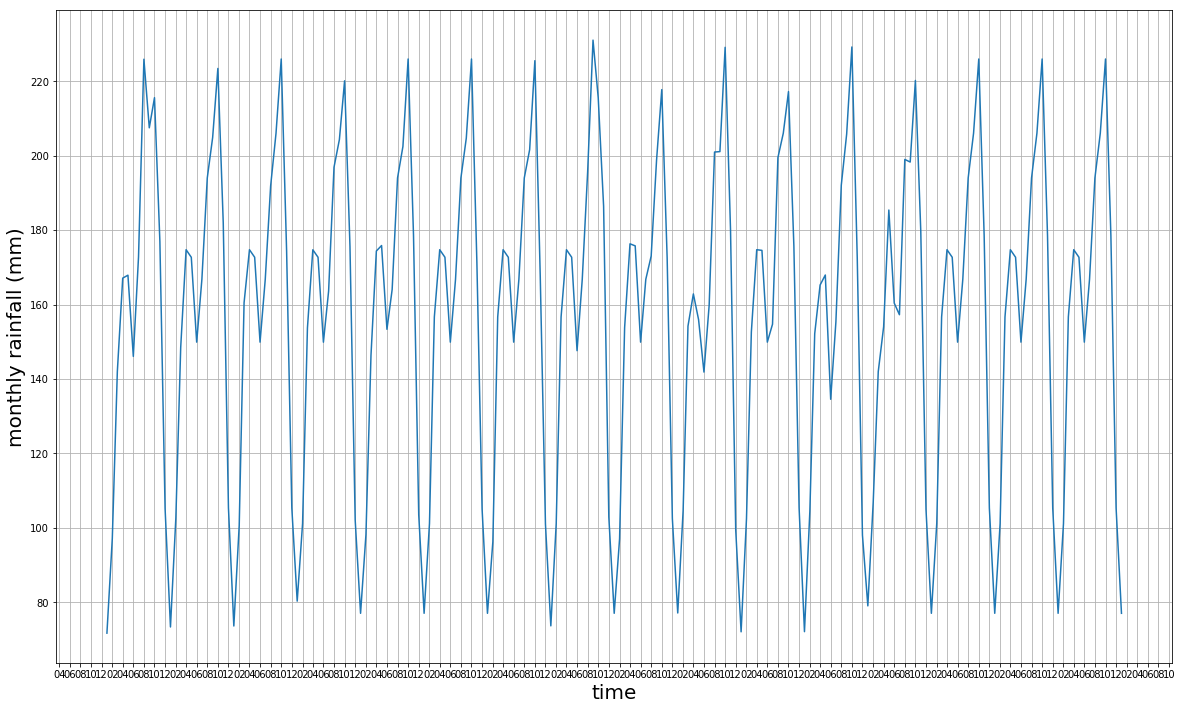

In [123]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)
r = np.arange(len(x))
plt.plot(date,x);
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.xlabel('time', fontsize = 20)
plt.ylabel("monthly rainfall (mm)", fontsize = 20)
plt.grid()

In [120]:
decomp = seasonal_decompose(x, model='additive',freq=12,extrapolate_trend="freq")
x = decomp.trend + decomp.resid

In [164]:
x, means = phase_averaging(x)

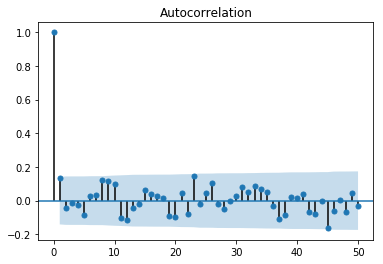

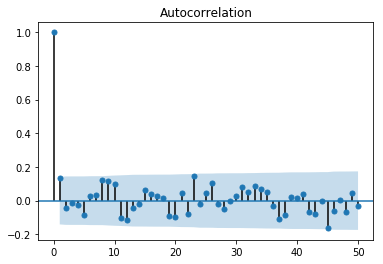

In [165]:
plot_acf(x, lags=50)

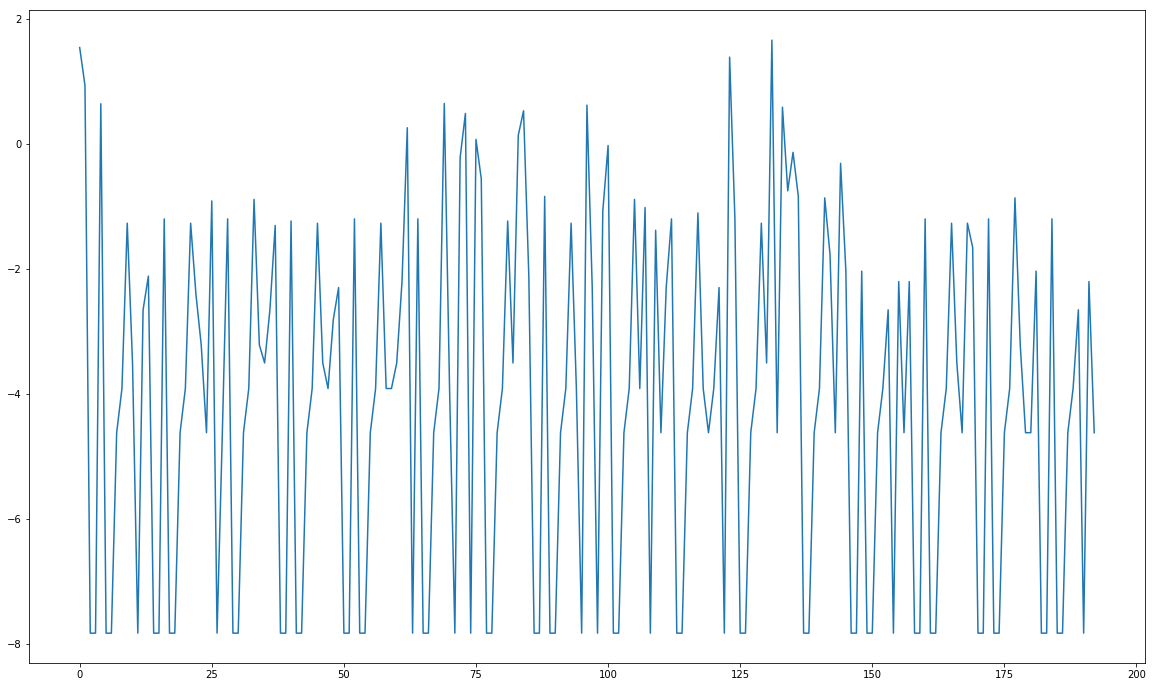

In [34]:
plt.figure(figsize=(20,12))
r = np.arange(len(x))
plt.plot(r,x_transforme);

In [140]:
# define input sequence
raw_seq = x_transforme
# choose a number of time steps
n_steps = 10
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [141]:
X_train, X_test, y_train, y_test = train_test_split_ts(X, y, test_size=0.2)

In [142]:
# define model
model = keras.models.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], n_features)))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse')

In [143]:
model.compile(optimizer='adam',loss='mse')
# fit model
model.fit(X_train, y_train, epochs=100, verbose=0)
y_hat = model.predict(X_test, verbose=0)

In [144]:
mean_squared_error(y_test,y_hat)

2.8337571389927194

In [145]:
r2_score(y_test,y_hat)

0.5271833777364392

In [138]:
mean_squared_error(y_test,y_hat)

16.872675376181576

In [139]:
r2_score(y_test,y_hat)

0.23859387910094165

In [86]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(75, activation='relu',return_sequences=True, input_shape=(X_train.shape[1], n_features)),
  tf.keras.layers.LSTM(75, activation='relu'),
  tf.keras.layers.Dense(1)
])

123.929016

0.9363527928895532

In [94]:
model = keras.models.Sequential([
  layers.Bidirectional(layers.LSTM(75, activation='relu',return_sequences=True, input_shape=(X_train.shape[1], n_features))),
  layers.Dense(1)
])

In [90]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [133]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2.6492504530203873

In [38]:
mean_squared_error(y_test,y_hat)

27.584679797743433

0.586925701398429

In [ ]:
arnage()

In [197]:
y_test = data[827:]

In [198]:
y_hat = []
x_input = data[828-n_steps:828]

In [199]:
for i in range(14):
    x_reshped = np.reshape(x_input,(1, n_steps, n_features))
    yhat = model.predict(x_reshped, verbose=0)
    y_hat.append(yhat[0][0])
    x_input = np.delete(x_input,0)
    x_input= np.append(x_input,yhat[0][0])

In [200]:
mean_squared_error(y_test,y_hat)

8.83949929095372

In [201]:
r2_score(y_test,y_hat)

-0.24783272072307927

In [ ]:
for i in range(len(y_test)):
    yhat[i] = yhat[i].tolist()[0][0]

In [119]:
x_input = data[828-n_steps:828]

In [180]:
mean_squared_error(y_test,y_hat)

5.897829575688318

In [181]:
r2_score(y_test,y_hat)

0.16742968311294926

In [42]:
# demonstrate prediction
x_input = array([9.400e-01, 1.000e-02, 1.020e+00, 1.570e+00, 3.970e+00, 1.038e+01,
       1.700e+00, 4.600e-01, 1.000e-02, 2.000e-02])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.23274788]]


In [36]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [48]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size)]
        data_X.append(a)
        data_Y.append(dataset[i + window_size])
    return(np.array(data_X), np.array(data_Y))

In [54]:
window_size = 1
dataset = create_dataset(data, window_size = 1)

In [57]:
TRAIN_SIZE = 0.60

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

TypeError: tuple indices must be integers or slices, not tuple

In [53]:
scaler = MinMaxScaler(feature_range = (0, 1))
train = scaler.fit_transform(train)

NameError: name 'train' is not defined

# Neural Network

In [15]:
data = pd.read_csv("precipitationBSh.csv")
data = data["0"].values
x = data

In [16]:
fuzzify(x)
#x, lambda_ = stats.boxcox(x)

In [14]:
n = 15
# Set forecasting window length (in years)
m = 1
# Set annual sampling rate
f = 12 
L = len(x)
errors = []
j = 0
for i in range(0,L - (n+m)*f,f):
    
    # define input sequence
    raw_seq = x[i:i+(n+m)*f]
    # choose a number of time steps
    n_steps = 20
    # split into samples
    X, y_test = train_test_split_ts_2d_raw(raw_seq, f) 
    X_train, y_train = split_sequence(X, n_steps)
    #X_train, X_test, y_train, y_test = train_test_split_ts_2d(X, y, 0.1666)
    #X_train, lambda_ = stats.boxcox(X_train)
    
    clf = MLPRegressor(solver='lbfgs',learning_rate_init = 0.001,learning_rate = 'adaptive', alpha=1e-5,hidden_layer_sizes=(100,50,20, ), random_state=1)
    clf.fit(X_train, y_train);
    y_hat= clf.predict(X_test)
    errors.append(sqrt(mean_squared_error(y_test,y_hat)))

NameError: name 'X_test' is not defined

In [37]:
n = 15
# Set forecasting window length (in years)
m = 1
# Set annual sampling rate
f = 12 
L = len(x)
errors = []
j = 0
for i in range(0,L - (n+m)*f,f):   
    # define input sequence
    raw_seq = x[i:i+(n+m)*f]
    # choose a number of time steps
    n_steps = 20
    # split into samples
    X, y_test = train_test_split_ts_2d_raw(raw_seq, f) 
    X_train, y_train = split_sequence(X, n_steps)
    #X_train, X_test, y_train, y_test = train_test_split_ts_2d(X, y, 0.1666)
    #X_train, lambda_ = stats.boxcox(X_train)
    
    clf = MLPRegressor(solver='sgd',learning_rate_init = 0.000001,learning_rate = 'adaptive', alpha=1e-5,hidden_layer_sizes=(100,50,20, ), random_state=1)
    clf.fit(X_train, y_train);
    y_hat = forecast(np.append(X_train[-1][1:],np.array(y_train[-1])), clf, f, n_steps)
    #y_hat= clf.predict(X_test)
    errors.append(sqrt(mean_squared_error(y_test,y_hat)))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

/home/mathsys2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/mathsys2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't co

In [27]:
errors

[38.10041761137301,
 42.14480597821849,
 38.348154857596306,
 25.86418263543344,
 22.275825301760538,
 45.47415349570609,
 57.56773431737994,
 37.09084284503836,
 21.336113854720413,
 28.218561003653072,
 30.75606925892947,
 45.37436572145341,
 38.60154010799949,
 31.44046213184182,
 31.485247132571335,
 24.642438760514192,
 36.10760262403549,
 76.83441257215065,
 43.385047869134894,
 70.1819081235953,
 21.561688739911006,
 48.35546762786705,
 35.27857340807483,
 40.45767815547954,
 27.23560099755998,
 43.329113355795805,
 48.12190788137387,
 80.93204931664002,
 47.48909061700091,
 38.74767202274846,
 56.17878413141468,
 23.799220683156495,
 12.161173546194139,
 43.44621666425084,
 74.40151509137176,
 62.840568390762584,
 63.24545514217684,
 29.953049229359607,
 35.20701641448255,
 45.96214210406463,
 74.26021055582866,
 39.292339979188384,
 26.608683483193694,
 42.93519465252343,
 16.072776206293714,
 30.37558939091299,
 41.389250792134476,
 34.154794958770445,
 60.74419933957933,
 33

In [92]:
np.append(X_train[-1][1:],np.array(y_train[-1]))

array([6.20734732e-01, 2.07347321e-02, 3.85073473e+00, 8.20734732e-01,
       9.50734732e-01, 1.24407347e+01, 3.71207347e+01, 1.01860735e+02,
       8.28207347e+01, 4.14007347e+01, 1.50630735e+02, 1.56507347e+01,
       6.40734732e-01, 5.07347321e-02, 2.00734732e-01, 6.60734732e-01,
       7.60734732e-01, 9.57073473e+00, 5.81807347e+01, 1.05380735e+02])

In [82]:
a

array([ 25.34073473,   0.31073473,   3.58073473,   0.42073473,
         0.77073473,  13.02073473,  45.48073473,  85.04073473,
        46.88073473,  28.89073473,  70.92073473,  33.48073473,
        16.82073473,   4.46073473,   5.65073473,  11.05073473,
         5.05073473,  34.02073473, 108.61073473, 122.00073473])

In [83]:
np.reshape(a,(1,20))

array([[ 25.34073473,   0.31073473,   3.58073473,   0.42073473,
          0.77073473,  13.02073473,  45.48073473,  85.04073473,
         46.88073473,  28.89073473,  70.92073473,  33.48073473,
         16.82073473,   4.46073473,   5.65073473,  11.05073473,
          5.05073473,  34.02073473, 108.61073473, 122.00073473]])

In [66]:
np.append(X_train[-1][1:],np.array(y_train[-1]))

array([15, 16, 17])

In [7]:
def forecast(first_item, model, h, n_step):
    x = first_item
    result = []
    #x = np.reshape(x,(1,20))
    for i in range(h):
        y = model.predict(np.reshape(x,(1,n_step)))
        result.append(y)
        x = np.append(x[1:],np.array(y))
    return(np.array(result))   

In [44]:
a = np.arange(30)

In [45]:
X, y_test = train_test_split_ts_2d_raw(a, f)

In [46]:
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [47]:
y_test

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [48]:
X_train, y_train = split_sequence(X_train, 3)

In [49]:
X_train

array([[ 0,  1,  2],
       [ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11],
       [10, 11, 12],
       [11, 12, 13],
       [12, 13, 14],
       [13, 14, 15],
       [14, 15, 16]])

In [50]:
y_train

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [19]:
X

array([[ 0,  1,  2],
       [ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11],
       [10, 11, 12],
       [11, 12, 13],
       [12, 13, 14],
       [13, 14, 15],
       [14, 15, 16],
       [15, 16, 17],
       [16, 17, 18],
       [17, 18, 19],
       [18, 19, 20],
       [19, 20, 21],
       [20, 21, 22],
       [21, 22, 23],
       [22, 23, 24],
       [23, 24, 25],
       [24, 25, 26],
       [25, 26, 27],
       [26, 27, 28]])

In [51]:
y_test

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [36]:
np.mean(errors)

31.907216813203547

In [38]:
np.mean(errors)

31.907216813203547

# Neural Network with Transformation

In [141]:
data = pd.read_csv("precipitationBSh.csv")
data = data["0"].values
x = data

In [142]:
fuzzify(x)

In [147]:
n = 15
# Set forecasting window length (in years)
m = 3
# Set annual sampling rate
f = 12 
L = len(x)
errors = []
j = 0
for i in range(0,L - (n+m)*f,f):
    x_, lambda_ = stats.boxcox(x[i:i+n*f])
    # define input sequence
    raw_seq = x[i:i+(n+m)*f]
    raw_seq = stats.boxcox(raw_seq, lambda_)
    # choose a number of time steps
    n_steps = 30
    # split into samples
    X, y = split_sequence(raw_seq, n_steps)
    X_train, X_test, y_train, y_test = train_test_split_ts_2d(X, y, 0.1666)
    #X_train, lambda_ = stats.boxcox(X_train)
    
    clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100,50,20, ), random_state=1)
    clf.fit(X_train, y_train);
    y_hat= clf.predict(X_test)
    y_hat = inv_boxcox(y_hat,lambda_)
    y_hat = np.nan_to_num(y_hat)
    y_test = inv_boxcox(y_test,lambda_)
    errors.append(sqrt(mean_squared_error(y_test,y_hat)))

In [148]:
np.mean(errors)

39.03340521811616

# LSTM

In [11]:
data = pd.read_csv("../precipitationBWh.csv")
data = data["0"].values
x = data

In [12]:
fuzzify(x)
x_transform = x
#x_transform, lambda_ = stats.boxcox(x)

In [13]:
raw_seq = x_transform
# choose a number of time steps
n_steps = 10
# split into samples
X, y = split_sequence(raw_seq, n_steps)
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X_train, X_test, y_train, y_test = train_test_split_ts_index(X, y, n*f)

In [9]:
n = 15
# Set forecasting window length (in years)
m = 3
# Set annual sampling rate
f = 12 
L = len(x)
errors = []
for i in range(0,L - (n+m)*f,f):
    # define input sequence
    raw_seq = x_transform[i:i+(n+m)*f]
    # choose a number of time steps
    n_steps = 10
    # split into samples
    X, y = split_sequence(raw_seq, n_steps)
    n_features = 1
    X = X.reshape((X.shape[0], X.shape[1], n_features))
    X_train, X_test, y_train, y_test = train_test_split_ts_index(X, y, n*f)
    


    model = keras.models.Sequential()
    model.add(layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], n_features)))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # fit model
    model.fit(X_train, y_train, epochs=100, verbose=0)
    y_hat = model.predict(X_test, verbose=0)
    
    errors.append(sqrt(mean_squared_error(y_test,y_hat)))

KeyboardInterrupt: 

In [151]:
np.mean(errors)

4.27894612928669

In [33]:
r2_score(y_test,y_hat)

0.19854328590084047

In [105]:
errors

[47.63493948499998, 18.4420881645133, 28.901700628958878, 11.581804841022933]

In [13]:
import math

In [18]:
inv_boxcox(2.315805839, -0.4396015)

nan